In [1]:
import pandas as pd
import numpy as np
#pd.pandas.set_option('display.max_columns',None)
#pd.pandas.set_option('display.max_rows',None)
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('SCMS_Delivery_History_Dataset.csv')

In [3]:
data = pd.read_csv('SCMS_Delivery_History_Dataset.csv')
data

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [5]:
df = data.copy()

In [6]:
df.shape

(10324, 33)

### Numeric columns

In [7]:
num_cols = [i for i in df.columns if df[i].dtype != 'O']
num_cols

['ID',
 'Unit of Measure (Per Pack)',
 'Line Item Quantity',
 'Line Item Value',
 'Pack Price',
 'Unit Price',
 'Line Item Insurance (USD)']

In [8]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          10324 non-null  int64  
 1   Unit of Measure (Per Pack)  10324 non-null  int64  
 2   Line Item Quantity          10324 non-null  int64  
 3   Line Item Value             10324 non-null  float64
 4   Pack Price                  10324 non-null  float64
 5   Unit Price                  10324 non-null  float64
 6   Line Item Insurance (USD)   10037 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 564.7 KB


In [9]:
discrete_cols = ['Unit of Measure (Per Pack)','Line Item Quantity']
cont_cols = ['Line Item Value','Pack Price','Unit Price','Line Item Insurance (USD)']
discrete_cols,cont_cols

(['Unit of Measure (Per Pack)', 'Line Item Quantity'],
 ['Line Item Value', 'Pack Price', 'Unit Price', 'Line Item Insurance (USD)'])

In [10]:
print(*[f'{i} : {len(df[i].unique())} unique values' for i in num_cols if i not in ['ID']],sep='\n')

Unit of Measure (Per Pack) : 31 unique values
Line Item Quantity : 5065 unique values
Line Item Value : 8741 unique values
Pack Price : 1175 unique values
Unit Price : 183 unique values
Line Item Insurance (USD) : 6723 unique values


### Discrete columns

In [11]:
df[discrete_cols].isnull().sum()

Unit of Measure (Per Pack)    0
Line Item Quantity            0
dtype: int64

In [12]:
for i in discrete_cols:
    print(df[i].value_counts())

60      4121
30      2630
100      976
240      670
120      474
20       470
90       222
300      157
1        126
25       114
200       76
180       76
270       53
336       39
40        25
84        22
1000      16
50        12
3          8
540        7
720        5
2          4
5          4
18         4
36         3
168        3
24         2
12         2
160        1
48         1
144        1
Name: Unit of Measure (Per Pack), dtype: int64
10000    93
1000     91
100      87
2000     73
5000     69
         ..
814       1
37680     1
3939      1
2607      1
36639     1
Name: Line Item Quantity, Length: 5065, dtype: int64


Datas in the discrete columns are good, no data cleaning is required.

#### Analysis:

- The count is maximum with 60 Unit of Measure(Per Pack)
- The count is maximum with 10,000 quantity in line Item

In [13]:
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

### Continuous columns

In [14]:
df[cont_cols].isnull().sum()

Line Item Value                0
Pack Price                     0
Unit Price                     0
Line Item Insurance (USD)    287
dtype: int64

#### Cleaning freight cost
But freight cost is also continuous columns, but showing as object hence cleaning that feature.

In [15]:
def cleaning_feature(col):
    value=[]
    term = []
    num = []
    index = df[col].unique()
    for i in index:
        if i[0] == 'S':
            value.append(i)
    for j in value:
        b = j.split(':')
        term.append(b[1])
    for i in term:
        c = i.split(')')
        num.append(int(c[0]))
    for index,id_num in zip(value,num):
        cost = df.iloc[np.where(df['ID'] == id_num)][col]
        term = str(cost)
        replace = term.split()[1]
        df[col].mask(df[col] == index,replace,inplace=True)
    return df[col].value_counts()

In [16]:
cleaning_feature('Freight Cost (USD)')

Freight Included in Commodity Cost    1442
Invoiced Separately                    239
Invoiced                               105
9736.1                                  37
7445.8                                  28
                                      ... 
51243.69                                 1
654.72                                   1
2478.87                                  1
9693.68                                  1
3410                                     1
Name: Freight Cost (USD), Length: 5435, dtype: int64

In [17]:
a = np.where(df['Freight Cost (USD)'] == 'Freight Included in Commodity Cost')
b = np.where(df['Freight Cost (USD)'] == 'Invoiced Separately')
c = np.where(df['Freight Cost (USD)'] == 'Invoiced')
d = np.concatenate((a,b,c),axis=None)
sample = df.iloc[d]
df.drop(sample.index,inplace = True)
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].astype('float64')
df.shape

(8538, 33)

In [18]:
cleaning_feature('Weight (Kilograms)')

112                           31
54                            30
2                             26
6                             26
Weight Captured Separately    23
                              ..
6304                           1
4822                           1
5623                           1
1604                           1
1547                           1
Name: Weight (Kilograms), Length: 3318, dtype: int64

In [19]:
## Replacing the Weight Captured Seperately and Weight with 0
df['Weight (Kilograms)'] = np.where(df['Weight (Kilograms)'] == 'Weight Captured Separately','0.0',df['Weight (Kilograms)'])
df['Weight (Kilograms)'] = np.where(df['Weight (Kilograms)'] == 'Weight','0.0',df['Weight (Kilograms)'])
df['Weight (Kilograms)'] = df['Freight Cost (USD)'].astype('float64')
df['Weight (Kilograms)'].value_counts()

9736.10     37
7445.80     28
6147.18     27
7329.83     20
9341.49     19
            ..
51243.69     1
654.72       1
2478.87      1
9693.68      1
3410.00      1
Name: Weight (Kilograms), Length: 5432, dtype: int64

In [20]:
df = df.reset_index(drop=True)

### Imputing the Line Item Insurance (USD)

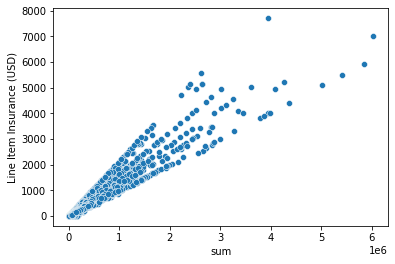

In [21]:
df['sum']=df['Freight Cost (USD)']+df['Line Item Value']
sns.scatterplot(df['sum'],df['Line Item Insurance (USD)'])

#### Analysis:
Since the Line item insurance depends on several factors such as total price of the goods, freight cost, destination, shipment mode etc. From the given data we can see that the sum of Line item value and the freightcost gives a linear relationship with the Line Item Insurance (USD). Hence imputing the insurance feature with linear regression algorithm.

In [22]:
missing_index = np.where(df['Line Item Insurance (USD)'].isnull())
#print(df.iloc[missing_index].shape)
#print(missing_index)

In [23]:
from sklearn.linear_model import LinearRegression
def imputing_insurance():
    df1=df.copy()
    df1 = df1[['Line Item Value','Freight Cost (USD)','Line Item Insurance (USD)']]
    df2 = df1.dropna()
    X = df2.loc[:,('Line Item Value','Freight Cost (USD)')]
    y = df2.loc[:,'Line Item Insurance (USD)']
    model=LinearRegression()
    model.fit(X,y)
    df_null = df1[df1['Line Item Insurance (USD)'].isnull()]
    X_null = df_null.loc[:,('Line Item Value','Freight Cost (USD)')]
    predict=model.predict(X_null)
    predict_series = pd.Series(predict,index=[  0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
             11,   12,   14,   79,   80,   81,   82,   83,   84,   85,   86,
             87,   88,   89,   91,   92,  170,  171,  172,  173,  174,  175,
            176,  177,  178,  179,  180,  181,  182,  183,  184,  186,  250,
            251,  252,  253,  254,  255,  256,  257,  314,  315,  316,  317,
            318,  319,  320,  321,  322,  323,  324,  325,  326,  327,  328,
            329,  330,  331,  400,  401,  402,  403,  404,  405,  406,  407,
            408,  409,  410,  468,  469,  470,  471,  472,  473,  474,  475,
            476,  477,  478,  479,  480,  544,  545,  546,  547,  548,  549,
            550,  617,  618,  619,  620,  621,  622,  623,  624,  625,  626,
            627,  628,  629,  630,  631,  632,  633,  634,  636,  637,  638,
            639,  641,  642,  806,  807,  808,  809,  810,  811,  812,  813,
            814,  815,  816,  817,  818,  819,  821,  822,  823,  824,  825,
            826, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014,
           1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1026, 1029,
           1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188,
           1189, 1190, 1191, 1192, 1193, 1197, 1198, 1200, 1201, 1202, 1203,
           1204, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412,
           1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1424, 1425, 1426,
           1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636,
           1637, 1638, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1649, 1832,
           1833, 1834, 1835, 1836, 1837, 1838, 1839, 1842, 1843, 1844, 1846,
           1847, 1848, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027,
           2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2037, 2038, 2039])
    df1['Line Item Insurance (USD)'] = df1['Line Item Insurance (USD)'].fillna(predict_series)
    df['Line Item Insurance (USD)'] = df1['Line Item Insurance (USD)']
    return df.head()

In [24]:
imputing_insurance().head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),sum
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,780.34,780.34,31.586199,1331.34
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,4521.50,4521.50,35.848354,10721.50
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,1653.78,1653.78,85.806624,41653.78
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,16007.06,16007.06,193.851640,143367.86
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,45450.08,45450.08,157.295484,167050.08


In [25]:
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    311
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1540
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [27]:
num_cols = [i for i in df.columns if df[i].dtype != 'O']
num_cols

['ID',
 'Unit of Measure (Per Pack)',
 'Line Item Quantity',
 'Line Item Value',
 'Pack Price',
 'Unit Price',
 'Weight (Kilograms)',
 'Freight Cost (USD)',
 'Line Item Insurance (USD)',
 'sum']

In [28]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8538 entries, 0 to 8537
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          8538 non-null   int64  
 1   Unit of Measure (Per Pack)  8538 non-null   int64  
 2   Line Item Quantity          8538 non-null   int64  
 3   Line Item Value             8538 non-null   float64
 4   Pack Price                  8538 non-null   float64
 5   Unit Price                  8538 non-null   float64
 6   Weight (Kilograms)          8538 non-null   float64
 7   Freight Cost (USD)          8538 non-null   float64
 8   Line Item Insurance (USD)   8538 non-null   float64
 9   sum                         8538 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 667.2 KB


In [29]:
discrete_cols = ['Unit of Measure (Per Pack)','Line Item Quantity']
cont_cols = ['Line Item Value','Pack Price','Unit Price','Line Item Insurance (USD)','Freight Cost (USD)','Line Item Insurance (USD)']
discrete_cols,cont_cols

(['Unit of Measure (Per Pack)', 'Line Item Quantity'],
 ['Line Item Value',
  'Pack Price',
  'Unit Price',
  'Line Item Insurance (USD)',
  'Freight Cost (USD)',
  'Line Item Insurance (USD)'])

### Categorical columns

In [30]:
catg_cols = [i for i in df.columns if df[i].dtype == 'O']
len(catg_cols)

24

In [31]:
## Checking unique values in the categorical columns
print(*[f'{i} : {len(df[i].unique())} unique values' for i in catg_cols],sep='\n')

Project Code : 132 unique values
PQ # : 1153 unique values
PO / SO # : 5595 unique values
ASN/DN # : 6198 unique values
Country : 39 unique values
Managed By : 2 unique values
Fulfill Via : 2 unique values
Vendor INCO Term : 8 unique values
Shipment Mode : 5 unique values
PQ First Sent to Client Date : 720 unique values
PO Sent to Vendor Date : 806 unique values
Scheduled Delivery Date : 1908 unique values
Delivered to Client Date : 1997 unique values
Delivery Recorded Date : 1947 unique values
Product Group : 5 unique values
Sub Classification : 6 unique values
Vendor : 55 unique values
Item Description : 167 unique values
Molecule/Test Type : 84 unique values
Brand : 45 unique values
Dosage : 54 unique values
Dosage Form : 17 unique values
Manufacturing Site : 79 unique values
First Line Designation : 2 unique values


In [32]:
catg_lessno_unique = [i for i in catg_cols if len(df[i].unique())<=15]
catg_lessno_unique

['Managed By',
 'Fulfill Via',
 'Vendor INCO Term',
 'Shipment Mode',
 'Product Group',
 'Sub Classification',
 'First Line Designation']

In [33]:
for i in catg_lessno_unique:
    print(df[i].value_counts())

PMO - US              8537
Haiti Field Office       1
Name: Managed By, dtype: int64
From RDC       5088
Direct Drop    3450
Name: Fulfill Via, dtype: int64
N/A - From RDC    5088
EXW               2575
FCA                367
DDP                320
CIP                178
DAP                  5
DDU                  3
CIF                  2
Name: Vendor INCO Term, dtype: int64
Air            5509
Truck          1820
Air Charter     576
Ocean           322
Name: Shipment Mode, dtype: int64
ARV     6960
HRDT    1534
ANTM      22
ACT       16
MRDT       6
Name: Product Group, dtype: int64
Adult                   5474
Pediatric               1486
HIV test                1429
HIV test - Ancillary     105
Malaria                   28
ACT                       16
Name: Sub Classification, dtype: int64
Yes    6198
No     2340
Name: First Line Designation, dtype: int64


In [34]:
df.shape

(8538, 34)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8538 entries, 0 to 8537
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            8538 non-null   int64  
 1   Project Code                  8538 non-null   object 
 2   PQ #                          8538 non-null   object 
 3   PO / SO #                     8538 non-null   object 
 4   ASN/DN #                      8538 non-null   object 
 5   Country                       8538 non-null   object 
 6   Managed By                    8538 non-null   object 
 7   Fulfill Via                   8538 non-null   object 
 8   Vendor INCO Term              8538 non-null   object 
 9   Shipment Mode                 8227 non-null   object 
 10  PQ First Sent to Client Date  8538 non-null   object 
 11  PO Sent to Vendor Date        8538 non-null   object 
 12  Scheduled Delivery Date       8538 non-null   object 
 13  Del

In [36]:
df[df['Shipment Mode'].isnull()].head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),sum
418,6768,102-GY-T01,Pre-PQ Process,SCMS-12680,ASN-968,Guyana,PMO - US,Direct Drop,CIF,NaN,...,390,14625.00,37.50,1.50,Not Applicable,Yes,186.25,186.25,23.400000,14811.25
617,10534,110-ZM-T01,Pre-PQ Process,SO-220,DN-4,Zambia,PMO - US,From RDC,N/A - From RDC,NaN,...,228,17948.16,78.72,0.29,Roche Madrid,Yes,1218.91,1218.91,55.445917,19167.07
621,10539,112-NG-T01,Pre-PQ Process,SO-328,DN-22,Nigeria,PMO - US,From RDC,N/A - From RDC,NaN,...,5151,105595.50,20.50,0.17,"Aspen-OSD, Port Elizabeth, SA",Yes,2921.00,2921.00,176.143231,108516.50
622,10540,100-CI-T01,Pre-PQ Process,SO-283,DN-16,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,NaN,...,2230,22857.50,10.25,0.17,"Aurobindo Unit III, India",Yes,2804.00,2804.00,60.763684,25661.50
624,10542,113-ZW-T01,Pre-PQ Process,SO-253,DN-5,Zimbabwe,PMO - US,From RDC,N/A - From RDC,NaN,...,1050,17062.50,16.25,0.54,"Aurobindo Unit III, India",Yes,1428.67,1428.67,54.006490,18491.17


In [37]:
df['Shipment Mode'].value_counts()

Air            5509
Truck          1820
Air Charter     576
Ocean           322
Name: Shipment Mode, dtype: int64

### Imputing Shipment Mode 

In [38]:
df['Shipment Mode'] = np.where(df['Shipment Mode'].isnull(),"Missing",df['Shipment Mode'])
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                      0
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1540
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [39]:
df['Dosage']=df['Dosage'].fillna(0)

In [40]:
df.isnull().sum()

ID                              0
Project Code                    0
PQ #                            0
PO / SO #                       0
ASN/DN #                        0
Country                         0
Managed By                      0
Fulfill Via                     0
Vendor INCO Term                0
Shipment Mode                   0
PQ First Sent to Client Date    0
PO Sent to Vendor Date          0
Scheduled Delivery Date         0
Delivered to Client Date        0
Delivery Recorded Date          0
Product Group                   0
Sub Classification              0
Vendor                          0
Item Description                0
Molecule/Test Type              0
Brand                           0
Dosage                          0
Dosage Form                     0
Unit of Measure (Per Pack)      0
Line Item Quantity              0
Line Item Value                 0
Pack Price                      0
Unit Price                      0
Manufacturing Site              0
First Line Des

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8538 entries, 0 to 8537
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            8538 non-null   int64  
 1   Project Code                  8538 non-null   object 
 2   PQ #                          8538 non-null   object 
 3   PO / SO #                     8538 non-null   object 
 4   ASN/DN #                      8538 non-null   object 
 5   Country                       8538 non-null   object 
 6   Managed By                    8538 non-null   object 
 7   Fulfill Via                   8538 non-null   object 
 8   Vendor INCO Term              8538 non-null   object 
 9   Shipment Mode                 8538 non-null   object 
 10  PQ First Sent to Client Date  8538 non-null   object 
 11  PO Sent to Vendor Date        8538 non-null   object 
 12  Scheduled Delivery Date       8538 non-null   object 
 13  Del

In [42]:
df.drop('sum',axis=1,inplace=True)

In [43]:
## converting the features such as Scheduled Delivery Date,Delivered to Client Date and Delivery Recorded Date to datetime

df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'])
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'])
df['Delivery Recorded Date'] = pd.to_datetime(df['Delivery Recorded Date'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8538 entries, 0 to 8537
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            8538 non-null   int64         
 1   Project Code                  8538 non-null   object        
 2   PQ #                          8538 non-null   object        
 3   PO / SO #                     8538 non-null   object        
 4   ASN/DN #                      8538 non-null   object        
 5   Country                       8538 non-null   object        
 6   Managed By                    8538 non-null   object        
 7   Fulfill Via                   8538 non-null   object        
 8   Vendor INCO Term              8538 non-null   object        
 9   Shipment Mode                 8538 non-null   object        
 10  PQ First Sent to Client Date  8538 non-null   object        
 11  PO Sent to Vendor Date        

In [45]:
df.to_csv('cleaned_data.csv',index=False)